In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [2]:
keras.__version__

'2.4.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]  # First item represents a coat

'Coat'

In [12]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# or

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-03-01 16:55:13.977766: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-01 16:55:13.977905: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-01 16:55:13.978468: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2241 - accuracy: 0.9188 - val_loss: 0.2917 - val_accuracy: 0.8930
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2212 - accuracy: 0.9215 - val_loss: 0.2968 - val_accuracy: 0.8908
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2188 - accuracy: 0.9211 - val_loss: 0.2941 - val_accuracy: 0.8954
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2137 - accuracy: 0.9235 - val_loss: 0.3062 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2111 - accuracy: 0.9241 - val_loss: 0.2961 - val_accuracy: 0.8952
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2074 - accuracy: 0.9263 - val_loss: 0.3170 - val_accuracy: 0.8908
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2053 - accuracy: 0.9259 - val_loss: 0.2963 - val_accura

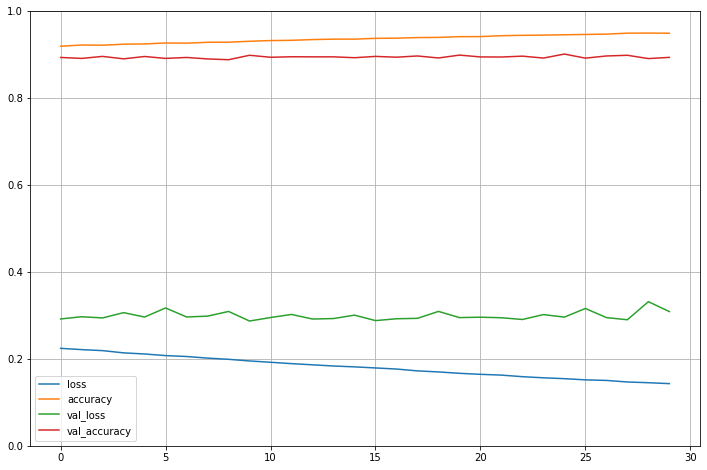

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8831


[0.3461188077926636, 0.8830999732017517]